# Observational study 

In [57]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import plotnine
import networkx as nx
from plotnine import ggplot, aes, geom_bar
from functions import *
import statsmodels.formula.api as smf
import spacy
import time
import datetime
import yfinance as yf

In [58]:
from popularity import trending_history
from financials import *
from compare import *

In [59]:
data = pd.read_csv('data/FinalFeatures2.csv.bz2')

In [60]:
data

,company,date,close,volume,money_volume,marketcap,popularity,Elon,compare,sentiment,numOccurrences
0,Apple,2015-02-05,27.025118,174826400.0,4.724704e+09,4.433849e+11,38,1,NaN,-0.1761,31
1,Microsoft,2015-02-05,37.361649,34616600.0,1.293333e+09,2.805105e+11,30,0,Apple,0.0000,0
2,IBM,2015-02-05,111.899719,3406299.0,3.811639e+08,1.002980e+11,4,0,Apple,0.0000,0
3,Samsung,2015-02-05,23147.441406,8005050.0,1.852964e+11,1.381851e+14,100,0,Apple,0.0000,0
4,Lenovo,2015-02-05,20.973963,57300.0,1.201808e+06,1.262811e+10,17,0,Apple,0.0000,0
...,...,...,...,...,...,...,...,...,...,...,...
3849,General Motors,2020-04-15,20.870001,11501700.0,2.400405e+08,3.030032e+10,3,0,Tesla,0.0000,0
3850,Tesla,2020-04-16,150.778000,65641000.0,9.897219e+09,1.514203e+11,100,1,NaN,0.2553,2
3851,Daimler,2020-04-16,27.833939,8416127.0,2.342540e+08,2.977675e+10,16,0,Tesla,0.0000,0
3852,VolksWagen,2020-04-16,117.395157,2322531.0,2.726539e+08,2.420747e+10,63,0,Tesla,0.0000,0


In [61]:
#samsungs marketCap is off by 1000x, we checked yahoo finance and there its off by 1000x as well, 
#... after lots of reading we found out that the stock price is in Korean Won
#Korean Won has hovered around 1000 per dollar for the time period we operate in so we will devide by that amount
data['marketcap'] = np.where(data['company'] == 'Samsung', data['marketcap']/1000, data['marketcap'])
data['money_volume'] = np.where(data['company'] == 'Samsung', data['money_volume']/1000, data['money_volume'])
data['close'] = np.where(data['company'] == 'Samsung', data['close']/1000, data['close'])
data

,company,date,close,volume,money_volume,marketcap,popularity,Elon,compare,sentiment,numOccurrences
0,Apple,2015-02-05,27.025118,174826400.0,4.724704e+09,4.433849e+11,38,1,NaN,-0.1761,31
1,Microsoft,2015-02-05,37.361649,34616600.0,1.293333e+09,2.805105e+11,30,0,Apple,0.0000,0
2,IBM,2015-02-05,111.899719,3406299.0,3.811639e+08,1.002980e+11,4,0,Apple,0.0000,0
3,Samsung,2015-02-05,23.147441,8005050.0,1.852964e+08,1.381851e+11,100,0,Apple,0.0000,0
4,Lenovo,2015-02-05,20.973963,57300.0,1.201808e+06,1.262811e+10,17,0,Apple,0.0000,0
...,...,...,...,...,...,...,...,...,...,...,...
3849,General Motors,2020-04-15,20.870001,11501700.0,2.400405e+08,3.030032e+10,3,0,Tesla,0.0000,0
3850,Tesla,2020-04-16,150.778000,65641000.0,9.897219e+09,1.514203e+11,100,1,NaN,0.2553,2
3851,Daimler,2020-04-16,27.833939,8416127.0,2.342540e+08,2.977675e+10,16,0,Tesla,0.0000,0
3852,VolksWagen,2020-04-16,117.395157,2322531.0,2.726539e+08,2.420747e+10,63,0,Tesla,0.0000,0


## Matching : 

In [62]:
add_propensityscore(data)

Optimization terminated successfully.
         Current function value: 0.247074
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                   Elon   No. Observations:                 3854
Model:                          Logit   Df Residuals:                     3850
Method:                           MLE   Df Model:                            3
Date:                Fri, 17 Dec 2021   Pseudo R-squ.:                  0.5536
Time:                        06:13:00   Log-Likelihood:                -952.22
converged:                       True   LL-Null:                       -2133.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.7384      0.076     -9.693      0.000      -0.888      -0.589
money_volume     7.7026

In [63]:
data

,company,date,close,volume,money_volume,marketcap,popularity,Elon,compare,sentiment,numOccurrences,propensity_score
0,Apple,2015-02-05,-0.417718,5.353629,1.559624,3.953253,-0.178602,1,NaN,-0.1761,31,0.973618
1,Microsoft,2015-02-05,-0.336983,0.608581,0.131357,2.235486,-0.367744,0,Apple,0.0000,0,0.014444
2,IBM,2015-02-05,0.245203,-0.447653,-0.248322,0.334862,-0.982453,0,Apple,0.0000,0,0.020137
3,Samsung,2015-02-05,-0.448005,-0.292020,-0.329850,0.734442,1.287243,0,Apple,0.0000,0,0.019729
4,Lenovo,2015-02-05,-0.464981,-0.560991,-0.406477,-0.589755,-0.675098,0,Apple,0.0000,0,0.041109
...,...,...,...,...,...,...,...,...,...,...,...,...
3849,General Motors,2020-04-15,-0.465793,-0.173684,-0.307063,-0.403373,-1.006096,0,Tesla,0.0000,0,0.050206
3850,Tesla,2020-04-16,0.548866,1.658524,3.712622,0.874027,1.287243,1,NaN,0.2553,2,1.000000
3851,Daimler,2020-04-16,-0.411401,-0.278108,-0.309472,-0.408895,-0.698741,0,Tesla,0.0000,0,0.059388
3852,VolksWagen,2020-04-16,0.288126,-0.484330,-0.293488,-0.467632,0.412465,0,Tesla,0.0000,0,0.135196


In [64]:
def get_similarity(propensity_score1, propensity_score2):
    '''Calculate similarity for instances with given propensity scores'''
    return 1-np.abs(propensity_score1-propensity_score2)

In [65]:
def matchingfunction(data):
    treatment_df = data[data['Elon'] == 1]
    control_df   = data[data['Elon'] == 0]
    # Create an empty undirected graph
    G = nx.Graph()
    # Loop through all the pairs of instances
    for control_id, control_row in control_df.iterrows():
        for treatment_id, treatment_row in treatment_df.iterrows():
            if (control_row['compare']== treatment_row['company']) and (control_row['date']== treatment_row['date']) :
                # Calculate the similarity 
                similarity = get_similarity(control_row['propensity_score'],
                                    treatment_row['propensity_score'])
                # Add an edge between the two instances weighted by the similarity between them
                G.add_weighted_edges_from([(control_id, treatment_id, similarity)])
    # Generate and return the maximum weight matching on the generated graph
    matching = nx.max_weight_matching(G)
    return matching

In [66]:
b = matchingfunction(data)

In [67]:
b

{(0, 4),
 (9, 5),
 (10, 14),
 (19, 15),
 (24, 20),
 (25, 29),
 (34, 30),
 (35, 36),
 (40, 44),
 (49, 45),
 (50, 54),
 (59, 55),
 (60, 61),
 (65, 68),
 (73, 70),
 (75, 78),
 (80, 84),
 (89, 85),
 (90, 92),
 (97, 95),
 (104, 100),
 (105, 109),
 (112, 110),
 (115, 117),
 (120, 124),
 (129, 125),
 (130, 134),
 (139, 135),
 (144, 140),
 (145, 147),
 (154, 150),
 (155, 159),
 (160, 163),
 (168, 165),
 (170, 173),
 (179, 175),
 (184, 180),
 (185, 189),
 (193, 190),
 (195, 197),
 (200, 202),
 (209, 205),
 (210, 211),
 (216, 215),
 (220, 222),
 (224, 225),
 (228, 231),
 (232, 235),
 (236, 238),
 (240, 243),
 (244, 247),
 (248, 250),
 (252, 254),
 (256, 259),
 (260, 263),
 (264, 265),
 (268, 269),
 (272, 274),
 (276, 279),
 (280, 283),
 (284, 287),
 (288, 289),
 (292, 293),
 (296, 297),
 (300, 302),
 (304, 305),
 (308, 310),
 (312, 314),
 (316, 318),
 (320, 323),
 (324, 327),
 (328, 331),
 (332, 335),
 (336, 339),
 (340, 343),
 (344, 347),
 (353, 349),
 (354, 357),
 (362, 359),
 (364, 367),
 (36

In [89]:
tesla_match = []
apple_match = []
twitter_match = []
ford_match = []
paypal_match = []
for pair in b:
    l = (data.iloc[int(pair[0])]['company'], data.iloc[int(pair[1])]['company'], data.iloc[int(pair[0])]['date'])
    if 'Tesla' in l:
        tesla_match.append(l)
    elif 'Apple' in l:
        apple_match.append(l)
    elif 'Twitter' in l:
        twitter_match.append(l)
    elif 'Ford' in l:
        ford_match.append(l)
    elif 'PayPal' in l:
        paypal_match.append(l)
apple_match[0:8]

[('Lenovo', 'Apple', '2015-05-14'),
 ('Lenovo', 'Apple', '2018-08-11'),
 ('Lenovo', 'Apple', '2015-02-24'),
 ('Apple', 'Lenovo', '2015-02-21'),
 ('Lenovo', 'Apple', '2016-07-03'),
 ('Apple', 'Lenovo', '2015-05-06'),
 ('Apple', 'IBM', '2018-11-02'),
 ('Apple', 'Lenovo', '2015-10-12')]

In [80]:
tesla_match

[('Tesla', 'VolksWagen', '2018-07-12'),
 ('VolksWagen', 'Tesla', '2019-09-09'),
 ('VolksWagen', 'Tesla', '2016-07-30'),
 ('VolksWagen', 'Tesla', '2019-09-28'),
 ('VolksWagen', 'Tesla', '2016-08-12'),
 ('VolksWagen', 'Tesla', '2015-01-30'),
 ('Tesla', 'VolksWagen', '2015-09-14'),
 ('Tesla', 'VolksWagen', '2015-10-10'),
 ('VolksWagen', 'Tesla', '2017-11-13'),
 ('General Motors', 'Tesla', '2017-07-31'),
 ('VolksWagen', 'Tesla', '2019-12-24'),
 ('Tesla', 'VolksWagen', '2018-09-11'),
 ('VolksWagen', 'Tesla', '2017-02-01'),
 ('Tesla', 'General Motors', '2017-09-14'),
 ('Tesla', 'VolksWagen', '2018-02-25'),
 ('VolksWagen', 'Tesla', '2019-03-13'),
 ('Tesla', 'VolksWagen', '2019-06-26'),
 ('VolksWagen', 'Tesla', '2018-02-20'),
 ('Tesla', 'VolksWagen', '2016-04-30'),
 ('Tesla', 'VolksWagen', '2016-05-11'),
 ('Tesla', 'VolksWagen', '2018-11-09'),
 ('VolksWagen', 'Tesla', '2018-03-12'),
 ('VolksWagen', 'Tesla', '2020-04-02'),
 ('VolksWagen', 'Tesla', '2020-03-12'),
 ('VolksWagen', 'Tesla', '2017-0

In [90]:
paypal_match

[('PayPal', 'Visa', '2016-07-21'),
 ('PayPal', 'EuroNet', '2019-03-07'),
 ('PayPal', 'Visa', '2019-03-06'),
 ('PayPal', 'Western Union', '2015-07-14'),
 ('PayPal', 'Visa', '2015-12-14'),
 ('PayPal', 'Western Union', '2017-11-01'),
 ('PayPal', 'Western Union', '2020-01-03'),
 ('PayPal', 'Western Union', '2020-04-15'),
 ('Western Union', 'PayPal', '2017-07-11'),
 ('Western Union', 'PayPal', '2020-01-21'),
 ('PayPal', 'Western Union', '2020-01-24'),
 ('PayPal', 'Visa', '2016-08-19'),
 ('PayPal', 'Western Union', '2017-07-15'),
 ('Visa', 'PayPal', '2015-10-09'),
 ('PayPal', 'Western Union', '2018-05-05'),
 ('Visa', 'PayPal', '2016-08-04'),
 ('Visa', 'PayPal', '2018-02-10')]

In [70]:
first_date = data.iloc[0]['date']

In [71]:
tesla_c = {'Tesla' : stock_history('Tesla', first_date, '2021-01-01'),
            'Daimler' : stock_history('Daimler', first_date, '2021-01-01'),
            'Lucid' : stock_history('Lucid', first_date, '2021-01-01'),
            'VolksWagen' : stock_history('VolksWagen', first_date, '2021-01-01'),
            'General Motors' : stock_history('General Motors', first_date, '2021-01-01')}

In [72]:
apple_c = {'Apple' : stock_history('Apple', first_date, '2021-01-01'),
            'IBM' : stock_history('IBM', first_date, '2021-01-01'),
            'Samsung' : stock_history('Samsung', first_date, '2021-01-01'),
            'Lenovo' : stock_history('Lenovo', first_date, '2021-01-01'),
            'Microsoft' : stock_history('Microsoft', first_date, '2021-01-01')}

In [73]:
twitter_c = {'Twitter' : stock_history('Twitter', first_date, '2021-01-01'),
            'Google' : stock_history('Google', first_date, '2021-01-01'),
            'Facebook' : stock_history('Facebook', first_date, '2021-01-01'),
            'Snapchat' : stock_history('Snapchat', first_date, '2021-01-01'),
            'Pinterest' : stock_history('Pinterest', first_date, '2021-01-01')}

In [74]:
ford_c = {'Ford' : stock_history('Ford', first_date, '2021-01-01'),
            'Toyota' : stock_history('Toyota', first_date, '2021-01-01'),
            'BMW' : stock_history('BMW', first_date, '2021-01-01'),
            'General Motors' : stock_history('General Motors', first_date, '2021-01-01'),
            'Stellantis' : stock_history('Stellantis', first_date, '2021-01-01')}

In [75]:
paypal_c = {'PayPal' : stock_history('PayPal', first_date, '2021-01-01'),
            'Western Union' : stock_history('Western Union', first_date, '2021-01-01'),
            'EuroNet' : stock_history('Euro net', first_date, '2021-01-01'),
            'MoneyGram' : stock_history('MoneyGram', first_date, '2021-01-01'),
            'Visa' : stock_history('Visa', first_date, '2021-01-01')}

In [76]:
def hist_from_hist(hist, start_date, end_date):
    internal_np = []
    for i in range(len(hist)):
        if hist.iloc[i].name.date() < datetime.date.fromisoformat(start_date):
            start = i
        if hist.iloc[i].name.date() > datetime.date.fromisoformat(end_date):
            end = i-1
            break
    return hist.copy().iloc[start:end]
def get_dates_c(start_date, weeks, days):
    start_date = dt.datetime.strptime(start_date, '%Y-%m-%d')
    end_date = start_date + dt.timedelta(weeks=weeks, days=days)
    return start_date.strftime('%Y-%m-%d'), end_date.strftime('%Y-%m-%d')
def dailyChangeC(hist, start_date, end_date):
    df = hist_from_hist(hist, start_date, end_date)
    result = []
    for i in range(len(df)-1):
        changeFromPreviousDay = 1-(df.iloc[i+1]['Close']/df.iloc[i]['Close'])
        result.append(float(changeFromPreviousDay))
    return result
#dailyChangeIndex(companies, start_date, end_date)

In [77]:
days = 5

In [93]:
def change_distributions(company_match, company_c):
    co = {[*company_c.keys()][0] : {'x' : [], 'y' : []},
        [*company_c.keys()][1] : {'x' : [], 'y' : []},
        [*company_c.keys()][2] : {'x' : [], 'y' : []},
        [*company_c.keys()][3] : {'x' : [], 'y' : []},
        [*company_c.keys()][4] : {'x' : [], 'y' : []}}
    
    for i in range(len(company_match)):
        dates = get_dates_c(company_match[i][2], 0, days)
        comp1 = company_match[i][0]
        try:
            temp = dailyChangeC(company_c[comp1], dates[0], dates[1])
            co[comp1]['x'].extend(temp)
            co[comp1]['y'].extend([*range(len(temp))])
        except:
            print('error with:', comp1)

        comp2 = company_match[i][1]
        try:
            temp = dailyChangeC(company_c[comp2], dates[0], dates[1])
            co[comp2]['x'].extend(temp)
            co[comp2]['y'].extend([*range(len(temp))])
        except:
            print('error with:', comp2)

    fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(1,5,sharey=True,figsize=(15,5))
    ax1.scatter([*co.values()][0]['y'], [*co.values()][0]['x'])
    ax1.set_title([*co.keys()][0])
    ax2.scatter([*co.values()][1]['y'], [*co.values()][1]['x'], label=[*co.keys()][1])
    ax2.set_title([*co.keys()][1])
    ax3.scatter([*co.values()][2]['y'], [*co.values()][2]['x'], label=[*co.keys()][2])
    ax3.set_title([*co.keys()][2])
    ax4.scatter([*co.values()][3]['y'], [*co.values()][3]['x'], label=[*co.keys()][3])
    ax4.set_title([*co.keys()][3])
    ax5.scatter([*co.values()][4]['y'], [*co.values()][4]['x'], label=[*co.keys()][4])
    ax5.set_title([*co.keys()][4])
    
    return co

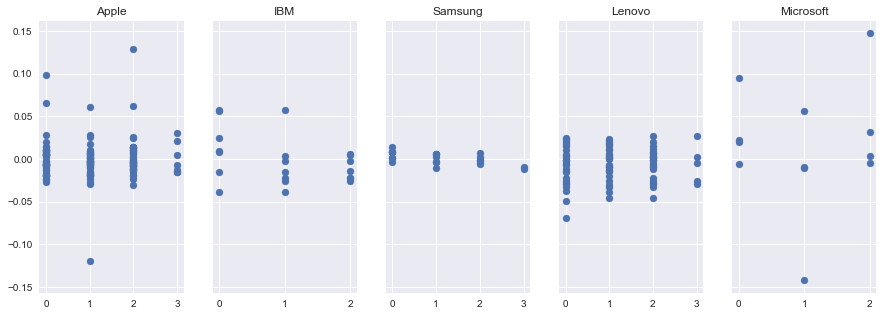

In [94]:
apple_dist = change_distributions(apple_match, apple_c)

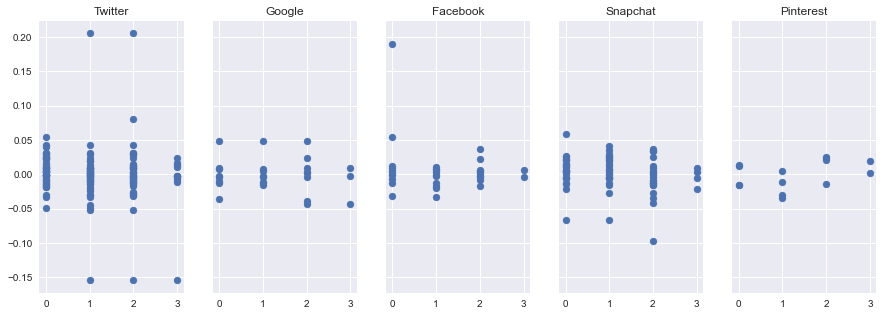

In [95]:
twitter_dist = change_distributions(twitter_match, twitter_c)

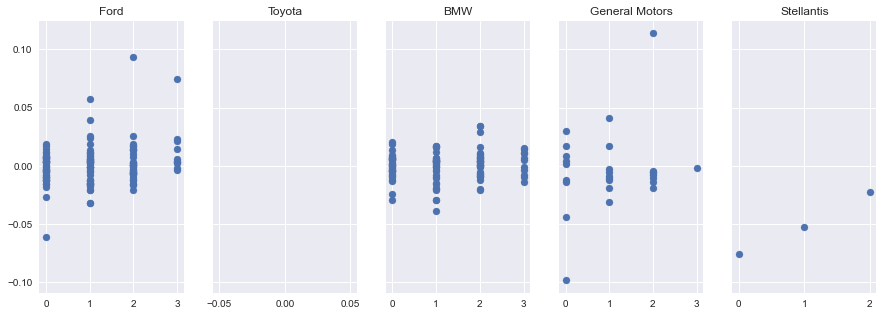

In [96]:
ford_dist = change_distributions(ford_match, ford_c)

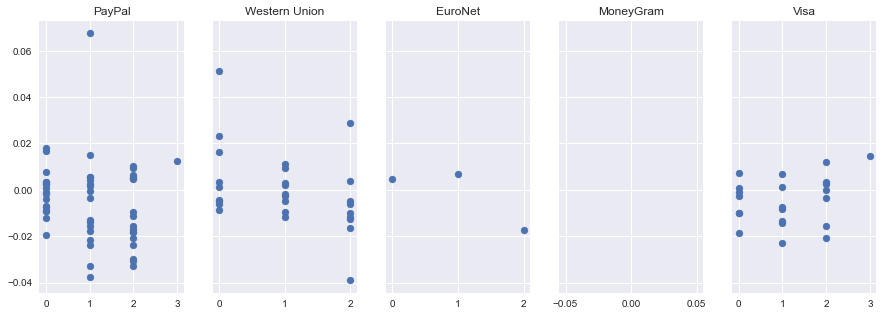

In [97]:
paypal_dist = change_distributions(paypal_match, paypal_c)

error with: VolksWagen
error with: Tesla
error with: VolksWagen
error with: Tesla
error with: VolksWagen
error with: VolksWagen
error with: Tesla
error with: Tesla
error with: VolksWagen
error with: VolksWagen
error with: Tesla
error with: Tesla
error with: VolksWagen
error with: Tesla
error with: VolksWagen


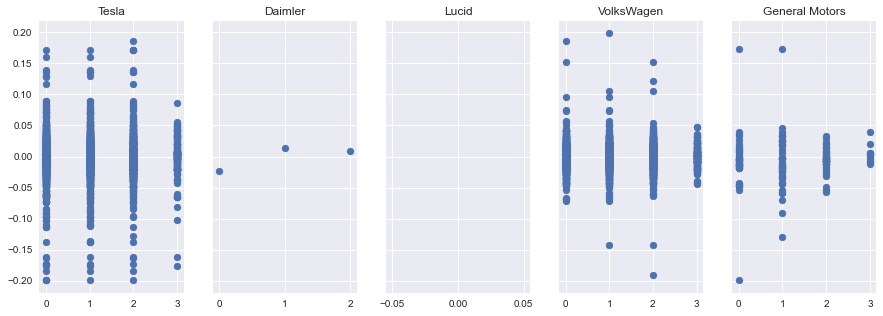

In [98]:
tesla_dist = change_distributions(tesla_match, tesla_c)

### Test on distribution

In [112]:
import scipy

In [106]:
apple_dists = np.c_[np.asarray(apple_dist['Apple']['x']),
                np.asarray(apple_dist['IBM']['x']),
                np.asarray(apple_dist['Samsung']['x']),
                np.asarray(apple_dist['Lenovo']['x']),
                np.asarray(apple_dist['Microsoft']['x'])]
plt.boxplot(apple_dists, labels=['Apple','IBM','Samsung','Lenovo','Microsoft'])
plt.show()

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 137 and the array at index 1 has size 21

In [140]:
def anova_oneway(comp_dist):
    A = comp_dist[[*comp_dist.keys()][0]]['x']
    B = comp_dist[[*comp_dist.keys()][1]]['x']
    C = comp_dist[[*comp_dist.keys()][2]]['x']
    D = comp_dist[[*comp_dist.keys()][3]]['x']
    E = comp_dist[[*comp_dist.keys()][4]]['x']
    return scipy.stats.f_oneway(A,B,C,D,E)

In [141]:
anova_oneway(apple_dist)

F_onewayResult(statistic=2.343460084299701, pvalue=0.055194373602028814)

In [142]:
anova_oneway(twitter_dist)

F_onewayResult(statistic=0.21633199551911492, pvalue=0.9292424198306793)

In [143]:
anova_oneway(ford_dist)

C:\Users\Ferdi\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\stats.py:3621: F_onewayBadInputSizesWarning: at least one input has length 0


F_onewayResult(statistic=nan, pvalue=nan)

In [148]:
A = ford_dist[[*ford_dist.keys()][0]]['x']
C = ford_dist[[*ford_dist.keys()][2]]['x']
D = ford_dist[[*ford_dist.keys()][3]]['x']
E = ford_dist[[*ford_dist.keys()][4]]['x']
scipy.stats.f_oneway(A,C,D,E)

F_onewayResult(statistic=8.496227523702105, pvalue=2.010346012975335e-05)

In [146]:
anova_oneway(paypal_dist)

F_onewayResult(statistic=nan, pvalue=nan)

In [149]:
A = paypal_dist[[*paypal_dist.keys()][0]]['x']
C = paypal_dist[[*paypal_dist.keys()][1]]['x']
D = paypal_dist[[*paypal_dist.keys()][2]]['x']
E = paypal_dist[[*paypal_dist.keys()][4]]['x']
scipy.stats.f_oneway(A,C,D,E)

F_onewayResult(statistic=0.6622971822468671, pvalue=0.5771543483936339)

In [147]:
anova_oneway(tesla_dist)

F_onewayResult(statistic=nan, pvalue=nan)

In [150]:
A = tesla_dist[[*tesla_dist.keys()][0]]['x']
C = tesla_dist[[*tesla_dist.keys()][1]]['x']
D = tesla_dist[[*tesla_dist.keys()][3]]['x']
E = tesla_dist[[*tesla_dist.keys()][4]]['x']
scipy.stats.f_oneway(A,C,D,E)

F_onewayResult(statistic=3.45421074133361, pvalue=0.015795622428412384)